
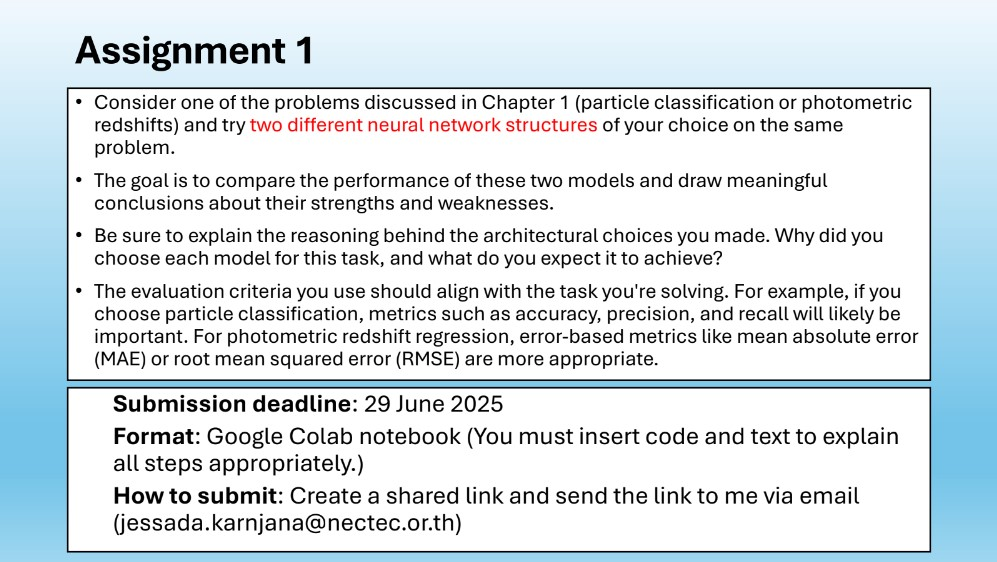

# CSS485-Deep Learning  (Group μ)

Member <br>
6522780467 Mr.Thanavin Denkavin (Model 2 Design)<br>
6522780632 Mr.Norraset Settasombutkul (Model 2 Design) <br>
6522780970 Mr.Jakkapob Kobsirichokdilok (Model 1 Design) <br>
6522781077 Mr.Pongsatorn Salwala  (Model 1 Evaluation)<br>
6522781143 Ms.Mutita Phansamdang  (Model 1 Evaluation)<br>
6522781242 Mr.Theme Mantharngkul  (Model 2 Evaluation)<br>
6522781481 Mr.Napas Keeratiworanun  (Model 1 Design)<br>
6522781499 Mr.Picha Lerttrakul  (Team Coordinator)<br>
6522781523 Mr.Keetaphat Thongdee (Model 2 Evaluation) <br>

Introduction <br>

This notebook focuses on solving a classification problem—Particle Classification—using two different neural network architectures, based on the related work in Dr. Jessada Karnjana's notebook (<a href="https://drive.google.com/file/d/1wzzx0mzQnGHTTXb5LO1Fy8AYom29g5aE/view?usp=sharing">see reference</a>).

Our objective is to explore alternative ways to improve model performance by increasing accuracy and reducing the gap between training and validation accuracy. We aim to achieve this by experimenting with the structure of hidden layers, identifying the optimal configuration that enhances overall performance.

In this notebook, we present two models: Model 1 and Model 2.



# Set up

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras.models import Sequential #the model is built adding layers one after the other
from keras.callbacks import EarlyStopping
from keras.layers import Dense #fully connected layers: every output talks to every input
from keras.layers import Dropout #for regularization
from keras.layers import BatchNormalization
from sklearn.preprocessing import StandardScaler

#Load Data


X = Input/Features and Y = Output/Labels <br>
We saved the two datasets in the Colab Notebooks folders in Google Drive directly

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
X = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Features_lim_2.csv')
y = np.genfromtxt('/content/drive/MyDrive/Colab Notebooks/Labels_lim_2.txt')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Set up Training, Validation and Testing Data


Why do we have to always shuffle first?
We randomly shuffle the data so the split isn't biased. (This is important if the original data is ordered.)

In [ ]:
#Always shuffle first
X,y = shuffle(X,y, random_state = 10)

X_train = X.values[:3000,:]
y_train = y[:3000]

X_val = X.values[3000:4000,:]
y_val = y[3000:4000]

X_test = X.values[4000:,:]
y_test = y[4000:]

X_train.shape, X_val.shape, X_test.shape

((3000, 24), (1000, 24), (1000, 24))

# Scaling

From Dr. Jessada's work, we learned that without feature scaling, the model can suffer from high absolute loss after 100 training epochs in a plotting graph, especially when the input features have widely varying ranges.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X_train)

StandardScaler()

In [ ]:
Xst_train = scaler.transform(X_train)
Xst_val = scaler.transform(X_val)
Xst_test = scaler.transform(X_test)

# Model 1 Version 1


In [ ]:
model = Sequential()

# Add an input layer and specify its size (number of original features)

model.add(Dense(20, activation='relu', input_shape=(24,)))

# Add one hidden layer and specify its size

model.add(Dense(20, activation='relu'))

# Add an output layer

model.add(Dense(1, activation='sigmoid'))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics = ['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Model 1 Version 1 Training

In [ ]:
mynet = model.fit(Xst_train, y_train, validation_data= (Xst_val, y_val), epochs = 100,  batch_size=200)

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.5083 - loss: 0.6993 - val_accuracy: 0.7790 - val_loss: 0.5896
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8293 - loss: 0.5634 - val_accuracy: 0.8650 - val_loss: 0.4818
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8607 - loss: 0.4678 - val_accuracy: 0.8740 - val_loss: 0.3981
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8748 - loss: 0.3844 - val_accuracy: 0.8870 - val_loss: 0.3303
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8879 - loss: 0.3202 - val_accuracy: 0.8930 - val_loss: 0.2782
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9047 - loss: 0.2682 - val_accuracy: 0.9080 - val_loss: 0.2409
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9079 - loss: 0.2385 - val_accuracy: 0.9140 - val_loss: 0.2145
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9201 - loss: 0.2092 - val_accuracy: 0.9220 - 

From the result, training accuracy improves steadily while loss decreases, indicating the model learns well from training data. However, validation accuracy fluctuates and sometimes drops despite continued training improvement. This suggest that model may performs worse on unseen data.

# Ploting and Evaluation


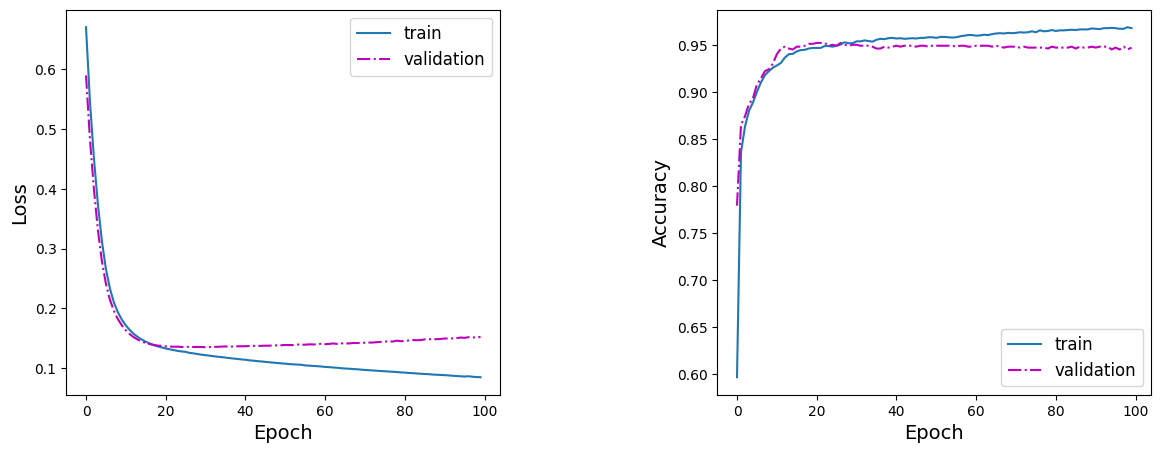

In [ ]:
plt.figure(figsize=(14,5))

plt.subplot(121)

plt.plot(mynet.history['loss'], label = 'train')
plt.plot(mynet.history['val_loss'],'-.m', label = 'validation')
plt.ylabel('Loss', fontsize = 14)
plt.xlabel('Epoch', fontsize = 14)
plt.legend(loc='upper right', fontsize = 12)

plt.subplot(122)

plt.plot(mynet.history['accuracy'], label = 'train')
plt.plot(mynet.history['val_accuracy'], '-.m', label = 'validation')
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Epoch', fontsize = 14)
plt.legend(fontsize = 12)
plt.subplots_adjust(wspace=0.5)

#plt.show()

#plt.savefig('FirstNN.png', dpi= 300)

The left plot shows that the loss for the training set plummeted during the first 10-15 epochs, before stabilizing in the later iterations (plateau effect). The validation perform as well as the training set and showing small signs of increasing in the later epochs.

The right plot shows that both sets are soaring within the first 10-15 epochs, before slowly stabilizing later. The validation set also performs slightly worse than the training set.

The small gaps between training and validation in both graphs suggest that the model didn't overfit.

In [ ]:
# Predict the probabilities
y_pred_probs = model.predict(Xst_test)

# Convert to class labels (0 or 1)
y_pred = (y_pred_probs > 0.5).astype(int)

# Get Accuracy, Precision and Recall
print("Accuracy:  %.2f%%" % (accuracy_score(y_test, y_pred) * 100))
print("Precision: %.2f%%" % (precision_score(y_test, y_pred) * 100))
print("Recall:    %.2f%%" % (recall_score(y_test, y_pred) * 100))

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Accuracy:  93.50%
Precision: 81.50%
Recall:    81.03%


From evaluation, high overall accuracy is 93.60%, but Precision 83.54% and recall 78.74% are  means it achieves high accuracy around 4 out of 5 of prediction that model made are correct.

# Model 1 Version 2


To solve this problem we decide to add batch normalization technique to normalize layer activations during training

In [ ]:
model = Sequential()

# Add an input layer and specify its size (number of original features)

model.add(Dense(20, activation='relu', input_shape=(24,)))

# Add BatchNormalization

model.add(BatchNormalization())

# Add one hidden layer and specify its size

model.add(Dense(20, activation='relu'))

# Add BatchNormalization

model.add(BatchNormalization())

# Add an output layer

model.add(Dense(1, activation='sigmoid'))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics = ['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Model 1 Version 2 Training

We decided to add early stop to avoid over-training.

In [ ]:
#add early stop
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
mynet = model.fit(Xst_train, y_train, validation_data= (Xst_val, y_val), epochs = 100,  batch_size=200,callbacks=[early_stop])

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 95ms/step - accuracy: 0.5832 - loss: 0.8337 - val_accuracy: 0.3100 - val_loss: 0.8640
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6734 - loss: 0.6481 - val_accuracy: 0.5190 - val_loss: 0.7336
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7603 - loss: 0.5310 - val_accuracy: 0.6860 - val_loss: 0.6373
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8158 - loss: 0.4552 - val_accuracy: 0.7800 - val_loss: 0.5608
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8579 - loss: 0.4015 - val_accuracy: 0.8250 - val_loss: 0.4942
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8891 - loss: 0.3548 - val_accuracy: 0.8560 - val_loss: 0.4338
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9014 - loss: 0.3343 - val_accuracy: 0.8820 - val_loss: 0.3836
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9005 - loss: 0.3270 - val_accuracy: 0.9

# Ploting and Evaluation


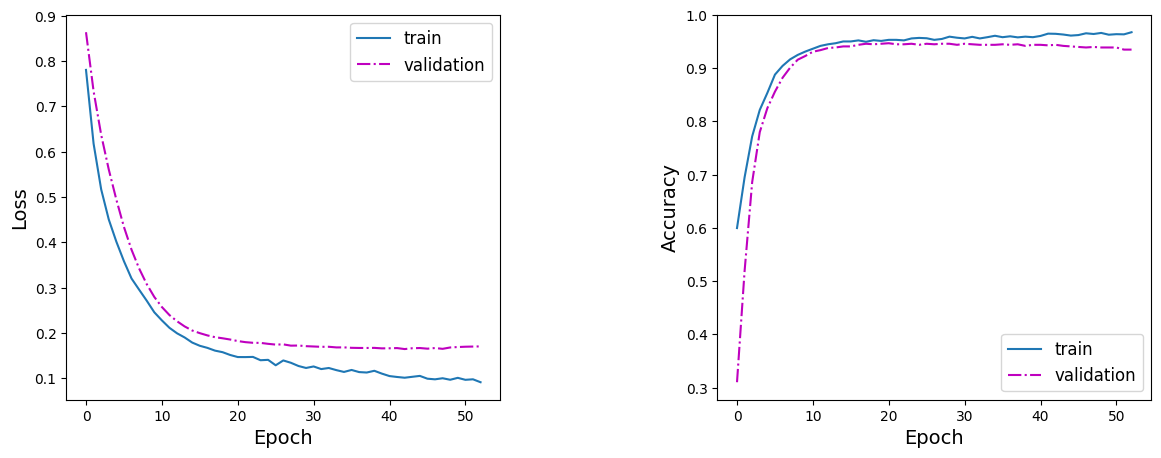

In [ ]:
plt.figure(figsize=(14,5))

plt.subplot(121)

plt.plot(mynet.history['loss'], label = 'train')
plt.plot(mynet.history['val_loss'],'-.m', label = 'validation')
plt.ylabel('Loss', fontsize = 14)
plt.xlabel('Epoch', fontsize = 14)
plt.legend(loc='upper right', fontsize = 12)

plt.subplot(122)

plt.plot(mynet.history['accuracy'], label = 'train')
plt.plot(mynet.history['val_accuracy'], '-.m', label = 'validation')
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Epoch', fontsize = 14)
plt.legend(fontsize = 12)
plt.subplots_adjust(wspace=0.5)

#plt.show()

#plt.savefig('FirstNN.png', dpi= 300)

The left plot shows training and validation set's losses plummeting during the first 10 epochs, before stabilizing in the later iterations. There exists a small gap between the training and validation set, indicating that the model doesn't overfit.

In the right plot, the model behaves almost similarly in the training and validation set, quickly soaring in accuracy in the first 10 epochs before stabilizing later.

In [ ]:
# Predict the probabilities
y_pred_probs = model.predict(Xst_test)

# Convert to class labels (0 or 1)
y_pred = (y_pred_probs > 0.5).astype(int)

# Get Accuracy, Precision and Recall
print("Accuracy:  %.2f%%" % (accuracy_score(y_test, y_pred) * 100))
print("Precision: %.2f%%" % (precision_score(y_test, y_pred) * 100))
print("Recall:    %.2f%%" % (recall_score(y_test, y_pred) * 100))

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Accuracy:  92.90%
Precision: 81.99%
Recall:    75.86%


The addition of BatchNormalization in Version 2 did not impact this behavior because it mainly addresses training stability, not class imbalance. Thus, both models converged to similar solutions, reflecting the need to incorporate techniques such as class weighting, resampling, or threshold adjustment to properly address the imbalance and improve detection of the minority class.

# Model 2, Version 1

To solve this problem we decide to add batch normalization technique to normalize layer activations during training

In [ ]:
model2 = Sequential()

# Add an input layer and specify its size (number of original features)

model2.add(Dense(20, activation='relu', input_shape=(24,)))

# Add one hidden layer and specify its size

model2.add(Dense(20, activation='relu'))

# Add one hidden layer and specify its size

model2.add(Dense(20, activation='relu'))

# Add an output layer

model2.add(Dense(1, activation='sigmoid'))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model2.compile(loss='binary_crossentropy', optimizer=optimizer, metrics = ['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Model 2, Version 1 Training

In [ ]:
mynet2 = model2.fit(Xst_train, y_train, validation_data= (Xst_val, y_val), epochs = 100,  batch_size=200)

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.5761 - loss: 0.6525 - val_accuracy: 0.8220 - val_loss: 0.5155
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8530 - loss: 0.4803 - val_accuracy: 0.8530 - val_loss: 0.3924
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8713 - loss: 0.3790 - val_accuracy: 0.8720 - val_loss: 0.3117
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8876 - loss: 0.3018 - val_accuracy: 0.8940 - val_loss: 0.2577
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9086 - loss: 0.2550 - val_accuracy: 0.9140 - val_loss: 0.2229
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9184 - loss: 0.2178 - val_accuracy: 0.9200 - val_loss: 0.2016
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9207 - loss: 0.1938 - val_accuracy: 0.9240 - val_loss: 0.1885
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9372 - loss: 0.1680 - val_accuracy: 0.92

According to the result, the accuracy is increasing, which means model gains more capability from the training data. However, validation is much lower than training accuracy which mean model is not perform well on unseen data this is a sign indicate that model may overfitting

# Ploting and Evaluation

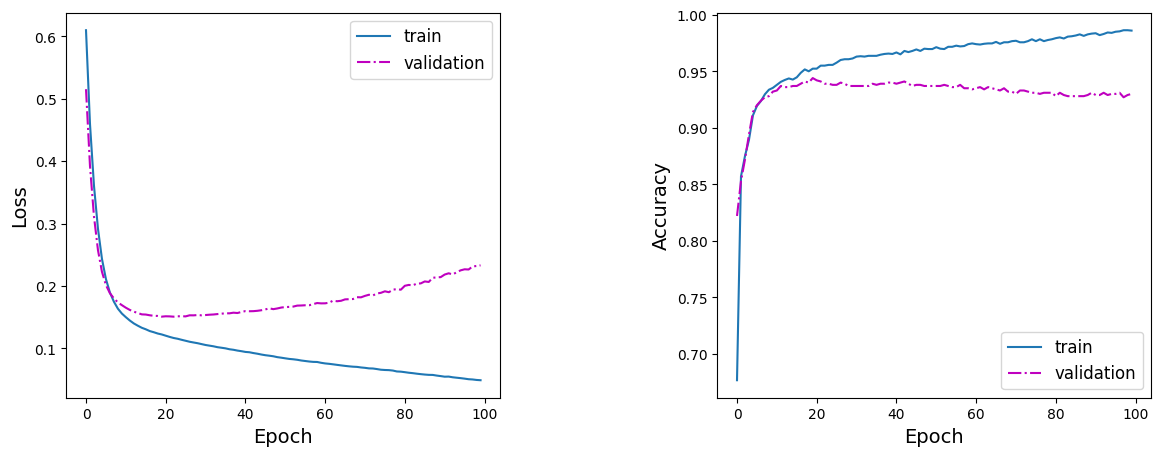

In [ ]:
plt.figure(figsize=(14,5))

plt.subplot(121)

plt.plot(mynet2.history['loss'], label = 'train')
plt.plot(mynet2.history['val_loss'],'-.m', label = 'validation')
plt.ylabel('Loss', fontsize = 14)
plt.xlabel('Epoch', fontsize = 14)
plt.legend(loc='upper right', fontsize = 12)

plt.subplot(122)

plt.plot(mynet2.history['accuracy'], label = 'train')
plt.plot(mynet2.history['val_accuracy'], '-.m', label = 'validation')
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Epoch', fontsize = 14)
plt.legend(fontsize = 12)
plt.subplots_adjust(wspace=0.5)

#plt.show()

#plt.savefig('FirstNN.png', dpi= 300)

From what we can see from the plot, the validation loss increase when training loss decrease which could be a sign that this model is overfitting. The accuracy plot also shows validation accuracy decrease as epoch increases so now we can be certain that the model is learning noise from the training data set and are now overfitting.

The possible cause of overfitting for this model is the additional hidden layer which makes the model learn more characteristics of the training data which is why it perform worse when used on validation data.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

# Predict the probabilities
y_pred_probs = model2.predict(Xst_test)

# Convert to class labels (0 or 1)
y_pred = (y_pred_probs > 0.5).astype(int)

# Get Accuracy, Precision and Recall
print("Accuracy:  %.2f%%" % (accuracy_score(y_test, y_pred) * 100))
print("Precision: %.2f%%" % (precision_score(y_test, y_pred) * 100))
print("Recall:    %.2f%%" % (recall_score(y_test, y_pred) * 100))

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Accuracy:  92.90%
Precision: 79.43%
Recall:    79.89%



The accuracy is at 91.70% which is high. On the other hand, the percision is at 78.26% which means that around 4 out of 5 times the model will be correct when it identify as positive. The recall is at 72.41% so the model will make mistake when identifying positive class data only around 1 times out of 5 times.

#Model 2 Version. 2

We decide to add dropout technique to trying to solve the overfitting problem.Dropout is a technique turn off some neuron randomly during training process.

In [ ]:
model2 = Sequential()

# Add an input layer and specify its size (number of original features)

model2.add(Dense(20, activation='relu', input_shape=(24,)))

# Dropout to prevent overfit

model2.add(Dropout(0.3))

# Add one hidden layer and specify its size

model2.add(Dense(20, activation='relu'))

# Dropout to prevent overfit

model2.add(Dropout(0.3))

# Add one hidden layer and specify its size

model2.add(Dense(20, activation='relu'))

# Dropout to prevent overfit

model2.add(Dropout(0.3))

# Add an output layer

model2.add(Dense(1, activation='sigmoid'))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model2.compile(loss='binary_crossentropy', optimizer=optimizer, metrics = ['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#Model 2 Version.2 Training

In [ ]:
mynet2 = model2.fit(Xst_train, y_train, validation_data= (Xst_val, y_val), epochs = 100,  batch_size=200)

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.5677 - loss: 0.6828 - val_accuracy: 0.8750 - val_loss: 0.5075
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7640 - loss: 0.5488 - val_accuracy: 0.8520 - val_loss: 0.4236
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8178 - loss: 0.4741 - val_accuracy: 0.8510 - val_loss: 0.3573
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8384 - loss: 0.4028 - val_accuracy: 0.8550 - val_loss: 0.3056
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8561 - loss: 0.3609 - val_accuracy: 0.8620 - val_loss: 0.2689
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8631 - loss: 0.3203 - val_accuracy: 0.8860 - val_loss: 0.2412
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8680 - loss: 0.3029 - val_accuracy: 0.9070 - val_loss: 0.2213
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8804 - loss: 0.2787 - val_accuracy: 0.9230 - 

# Ploting and Evaluation

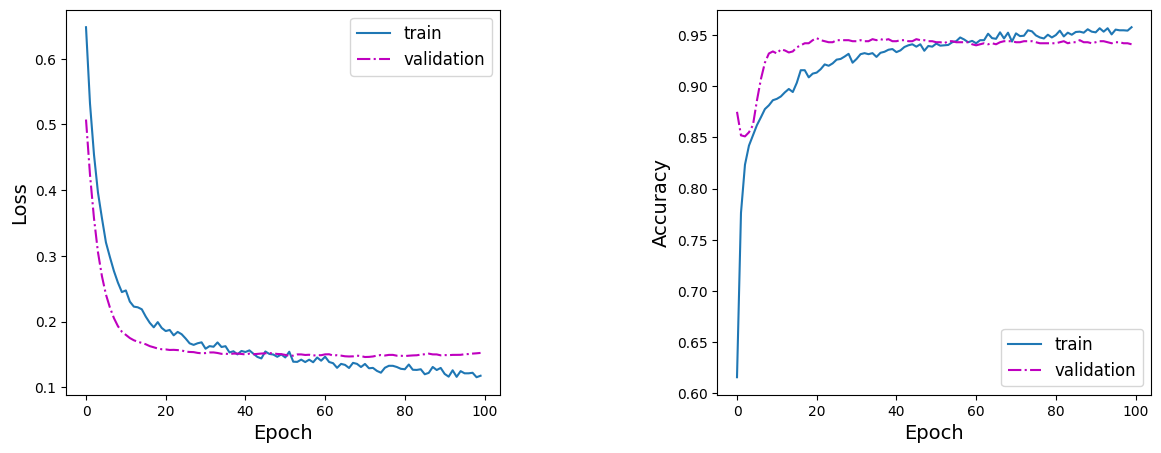

In [ ]:
plt.figure(figsize=(14,5))

plt.subplot(121)

plt.plot(mynet2.history['loss'], label = 'train')
plt.plot(mynet2.history['val_loss'],'-.m', label = 'validation')
plt.ylabel('Loss', fontsize = 14)
plt.xlabel('Epoch', fontsize = 14)
plt.legend(loc='upper right', fontsize = 12)

plt.subplot(122)

plt.plot(mynet2.history['accuracy'], label = 'train')
plt.plot(mynet2.history['val_accuracy'], '-.m', label = 'validation')
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Epoch', fontsize = 14)
plt.legend(fontsize = 12)
plt.subplots_adjust(wspace=0.5)

#plt.show()

#plt.savefig('FirstNN.png', dpi= 300)

When training Model 2 Version 2, dropout was added to the architecture. This modification significantly improved the model's performance, as reflected by the validation accuracy, which increased to 94.80%, compared to the training accuracy of 95.41%.

Normally, during training, the model tends to rely heavily on the most effective neurons, leading to those specific neurons being updated more frequently while others remain underutilized. This can cause overfitting, where the model performs well on training data but poorly on unseen data.

By introducing dropout, some neurons are randomly deactivated during training, forcing the model to distribute learn redundant representations and prevents it from becoming overly dependent on specific neurons. This helps all neurons learn to represent the data more effectively. As a result, the model becomes more generalized and performs better on new, unseen data, reducing the risk of overfitting.

In [ ]:
# Predict the probabilities
y_pred_probs = model2.predict(Xst_test)

# Convert to class labels (0 or 1)
y_pred = (y_pred_probs > 0.5).astype(int)

# Get Accuracy, Precision and Recall
print("Accuracy:  %.2f%%" % (accuracy_score(y_test, y_pred) * 100))
print("Precision: %.2f%%" % (precision_score(y_test, y_pred) * 100))
print("Recall:    %.2f%%" % (recall_score(y_test, y_pred) * 100))

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Accuracy:  93.50%
Precision: 82.25%
Recall:    79.89%


The accuracy is at 93.40% which is high. On the other hand, the percision is at 80.00% which means that around 4 out of 5 times the model will be correct when it identify as positive. The recall is at 82.76 so the model will make mistake when identifying positive class data only around 1 times out of 5 times.

# Comparison

Compared to Model 1, which achieved high accuracy but precision and recall are lower than Model2, Model 2 significantly improved performance, achieving 93.40% accuracy with balanced precision and recall of 80.00% and 82.76%. Its stable loss and accuracy curves indicate effective learning and generalization. Thus, Model 2 is the clear choice, as it successfully handles both classes.